In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

customer_csv_file_path = 'c:/Users/Awhy/OneDrive/Desktop/PARA/Project/PORTFOLIO/Repo/Portfolio/Sales Intelligence/Data/customer_data.csv'
marketings_csv_file_path = 'c:/Users/Awhy/OneDrive/Desktop/PARA/Project/PORTFOLIO/Repo/Portfolio/Sales Intelligence/Data/marketing_data.csv'
operational_csv_file_path = 'c:/Users/Awhy/OneDrive/Desktop/PARA/Project/PORTFOLIO/Repo/Portfolio/Sales Intelligence/Data/operational_data.csv'
sales_data_csv_file_path = 'c:/Users/Awhy/OneDrive/Desktop/PARA/Project/PORTFOLIO/Repo/Portfolio/Sales Intelligence/Data/sales_data.csv'
sales_team_data_csv_file_path = 'c:/Users/Awhy/OneDrive/Desktop/PARA/Project/PORTFOLIO/Repo/Portfolio/Sales Intelligence/Data/sales_team_data.csv'

customer_data = pd.read_csv(customer_csv_file_path)
marketings = pd.read_csv(marketings_csv_file_path)
operational = pd.read_csv(operational_csv_file_path)
sales_data = pd.read_csv(sales_data_csv_file_path)
sales_team_data = pd.read_csv(sales_team_data_csv_file_path)

In [21]:
# Display the first few rows of each separated dataset
(sales_data.head(), customer_data.head(), marketing_data.head(), sales_team_data.head(), operational_data.head())

(      Transaction ID  Product ID Product Category          Sales Date  \
 2957            9746         155     CRM software 2020-01-01 04:15:15   
 816             9680         119     CRM software 2020-01-01 04:29:26   
 3946            3392         138     CRM software 2020-01-01 05:57:19   
 4902            7657         110     CRM software 2020-01-01 16:03:32   
 4592            1301         128    cloud storage 2020-01-01 17:55:31   
 
       Revenue  Customer ID  Time Index  
 2957  1634.84        18873           0  
 816   1756.28        17118           1  
 3946  1022.09        11558           2  
 4902  2571.42        13484           3  
 4592  3243.98        18762           4  ,
    Customer ID  Customer Age       Location    Industry      Customer Since
 0        17181            60           Asia      Retail 2020-01-14 22:31:31
 1        19093            30           Asia     Finance 2020-10-17 15:31:53
 2        11151            37  North America     Finance 2020-08-11 16

<ipython-input-14-7a97107a42f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Sales Date'] = pd.to_datetime(sales_data['Sales Date'])


<Figure size 1296x432 with 0 Axes>

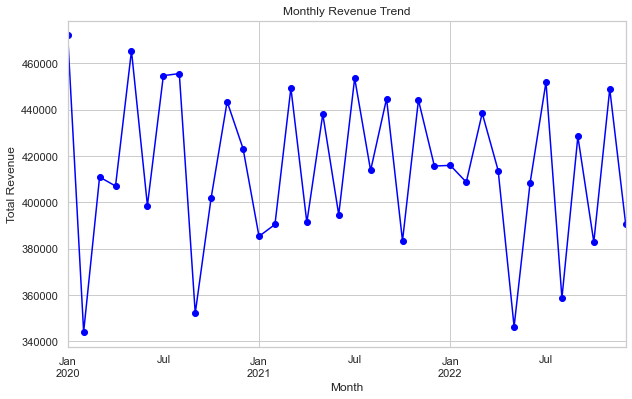

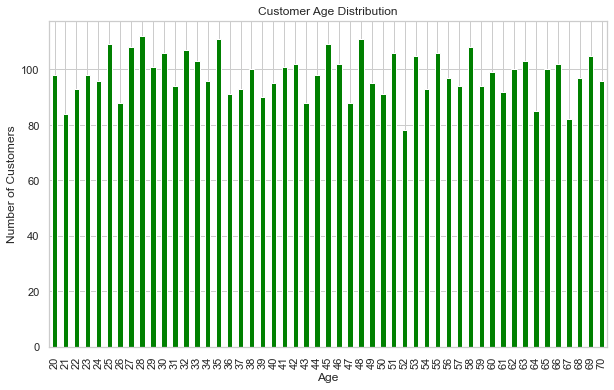

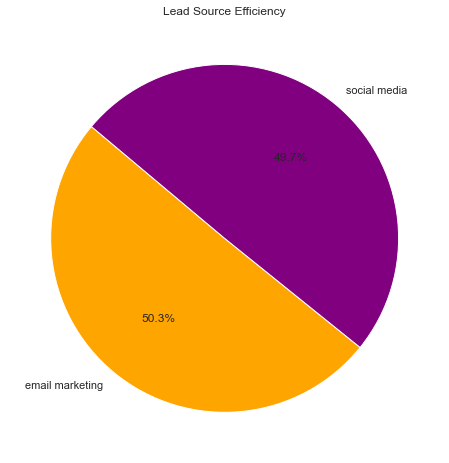

In [14]:
# Setting up visualization style
sns.set(style="whitegrid")

# 1. Sales Data Analysis
# Trends over Time (Monthly Revenue)
sales_data['Sales Date'] = pd.to_datetime(sales_data['Sales Date'])
monthly_revenue = sales_data.resample('M', on='Sales Date')['Revenue'].sum()

# 2. Customer Data Analysis
# Age Distribution of Customers
age_distribution = customer_data['Customer Age'].value_counts().sort_index()

# 3. Marketing and Lead Data Analysis
# Efficiency of Lead Sources
lead_source_efficiency = marketing_data['Lead Source'].value_counts()

# Plotting the analyses
plt.figure(figsize=(18, 6))

# Creating separate plots for each analysis

# 1. Monthly Revenue Trend Plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', color='blue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# 2. Customer Age Distribution Plot
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='green')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# 3. Lead Source Efficiency Plot
plt.figure(figsize=(8, 8))
lead_source_efficiency.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'purple'])
plt.title('Lead Source Efficiency')
plt.ylabel('')  # to remove the label 'Lead Source'
plt.show()


In [40]:
# Customer Data Analysis: Target Demographics and Industry Focus

# Analyzing Age Distribution
age_distribution_analysis = customer_data['Customer Age'].describe()

# Analyzing Location Distribution
location_distribution_analysis = customer_data['Location'].value_counts()

# Analyzing Industry Distribution
industry_distribution_analysis = customer_data['Industry'].value_counts()


age_distribution_analysis,location_distribution_analysis,industry_distribution_analysis

(count    5000.00000
 mean       44.88980
 std        14.67651
 min        20.00000
 25%        32.00000
 50%        45.00000
 75%        58.00000
 max        70.00000
 Name: Customer Age, dtype: float64,
 North America    1273
 Europe           1258
 South America    1242
 Asia             1227
 Name: Location, dtype: int64,
 Technology    1282
 Retail        1273
 Finance       1260
 Healthcare    1185
 Name: Industry, dtype: int64)

Text(0, 0.5, 'Number of Customers')

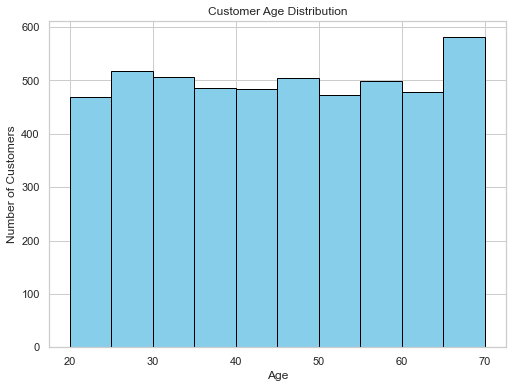

In [38]:
# Plotting the Age Distribution
plt.figure(figsize=(18, 6))

# Age Distribution
plt.subplot(1, 2, 1)
customer_data['Customer Age'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

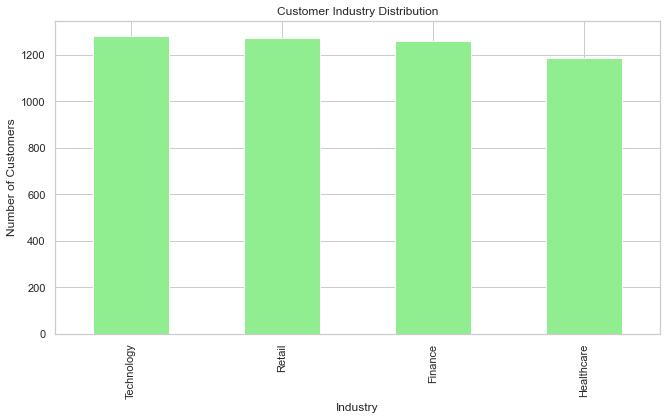

In [27]:
# Plotting the Age Distribution
plt.figure(figsize=(18, 6))

# Industry Distribution
plt.subplot(1, 2, 2)
industry_distribution_analysis.plot(kind='bar', color='lightgreen')
plt.title('Customer Industry Distribution')
plt.xlabel('Industry')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

Text(0, 0.5, '')

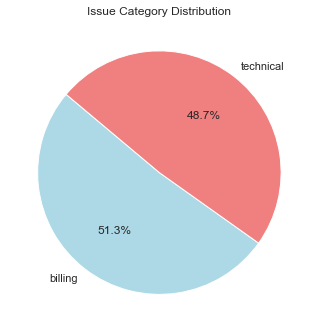

In [28]:
# Operational Data Analysis

# Analyzing Common Issues
issue_category_analysis = operational_data['Issue Category'].value_counts()

# Analyzing Resolution Time
resolution_time_analysis = operational_data['Resolution Time'].describe()

# Analyzing Customer Satisfaction
customer_satisfaction_analysis = operational_data['Customer Satisfaction Score'].describe()

# Plotting the analyses
plt.figure(figsize=(12, 6))

# Issue Category Analysis
plt.subplot(1, 2, 1)
issue_category_analysis.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Issue Category Distribution')
plt.ylabel('')



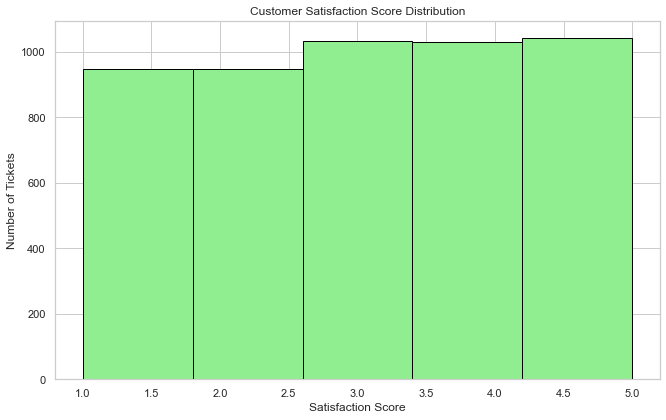

In [30]:
# Plotting the analyses
plt.figure(figsize=(18, 6))

# Customer Satisfaction Score Distribution
plt.subplot(1, 2, 2)
operational_data['Customer Satisfaction Score'].plot(kind='hist', bins=5, color='lightgreen', edgecolor='black')
plt.title('Customer Satisfaction Score Distribution')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Tickets')

plt.tight_layout()
plt.show()

<ipython-input-50-15fe6f11adf1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Moving Average'] = sales_data['Revenue'].rolling(window=window_size).mean()


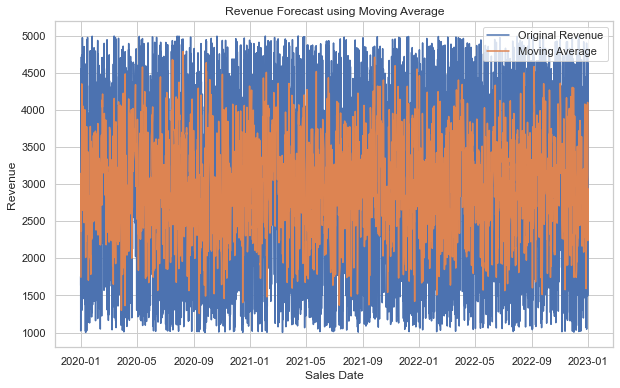

In [50]:
# Display the first few rows of each separated dataset
sales_data.head()
# Calculate moving average
window_size = 4  # Adjust the window size as needed
sales_data['Moving Average'] = sales_data['Revenue'].rolling(window=window_size).mean()


# Plot the original revenue and moving average
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Sales Date'], sales_data['Revenue'], label='Original Revenue')
plt.plot(sales_data['Sales Date'], sales_data['Moving Average'], label='Moving Average')
plt.title('Revenue Forecast using Moving Average')
plt.xlabel('Sales Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()





In [37]:
sales_data['Product Category'].value_counts()


CRM software     2535
cloud storage    2465
Name: Product Category, dtype: int64

In [32]:
# Display the first few rows of each separated dataset
customer_data.head()

,Customer ID,Customer Age,Location,Industry,Customer Since
0,17181,60,Asia,Retail,2020-01-14 22:31:31
1,19093,30,Asia,Finance,2020-10-17 15:31:53
2,11151,37,North America,Finance,2020-08-11 16:03:02
3,10797,41,Europe,Technology,2020-12-09 17:34:09
4,15464,40,North America,Retail,2020-01-11 22:05:38


In [33]:
marketing_data.head()

,Lead ID,Lead Source,Lead Conversion Date,Lead Score
0,29563,social media,2020-01-23 22:24:59,3
1,23557,email marketing,2021-09-12 17:28:11,10
2,22086,email marketing,2020-09-14 22:49:57,2
3,22431,social media,2021-01-24 13:11:29,6
4,28574,email marketing,2022-04-11 06:27:12,6


In [34]:
sales_team_data.head()

,Sales Rep ID,Number of Leads Handled,Number of Successful Conversions,Total Sales Value
0,332,61,32,17457.20
1,341,80,16,12292.06
2,330,57,17,9068.28
3,379,38,34,19940.07
4,331,52,39,8201.59


In [36]:
operational_data.head()

,Support Ticket ID,Issue Category,Resolution Time,Customer Satisfaction Score
0,44055,technical,43,3
1,46177,billing,29,5
2,44511,billing,11,4
3,41067,billing,37,1
4,49819,technical,14,1
